In [3]:
## Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [4]:
## Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

## Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [13]:
## merge the data
master_df = mouse_metadata.merge(study_results, on='Mouse ID')

In [14]:
master_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
master_df = master_df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [18]:
master_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
master_df.duplicated(subset=['mouse_id', 'timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [20]:
# Checking the number of mice.
dup_mouse = master_df.loc[master_df.duplicated(subset=['mouse_id', 'timepoint']), 'mouse_id'].unique()
dup_mouse

array(['g989'], dtype=object)

In [21]:
clean_df = master_df[master_df['mouse_id'].isin(dup_mouse) == False]

In [22]:
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [26]:
##clean_df.groupby('drug_regimen')['tumor_volume_(mm3)'].mean()

In [27]:
means = clean_df.groupby('drug_regimen').mean()['tumor_volume_(mm3)']
medians = clean_df.groupby('drug_regimen').median()['tumor_volume_(mm3)']
variance = clean_df.groupby('drug_regimen').var()['tumor_volume_(mm3)']
std_dev = clean_df.groupby('drug_regimen').std()['tumor_volume_(mm3)']
std_err = clean_df.groupby('drug_regimen').sem()['tumor_volume_(mm3)']

In [28]:
summary_table = pd.DataFrame({
    'mean_tumor_volume': means,
    'median_tumor_volume': medians,
    'tumor_volume_variance': variance,
    'tumor_volume_std_dev': std_dev,
    'tumor_volume_std_err': std_err
})
summary_table 

,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std_dev,tumor_volume_std_err
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
##clean_df.groupby('drug_regimen').agg({
##    'tumor_volume_(mm3)': ['mean', 'median', 'var', 'std', 'sem']
##})

## Bar and Pie Charts

In [31]:
clean_df.columns

Index(['mouse_id', 'drug_regimen', 'sex', 'age_months', 'weight_(g)',
       'timepoint', 'tumor_volume_(mm3)', 'metastatic_sites'],
      dtype='object')

### DataFrame Plot

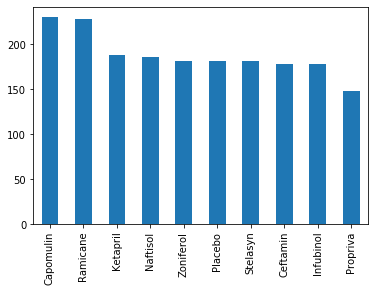

In [33]:
clean_df['drug_regimen'].value_counts().plot(kind='bar')

### Matplotlib Plot

<BarContainer object of 10 artists>

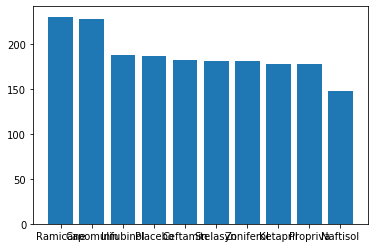

In [40]:
plt.bar(x=clean_df['drug_regimen'].unique(),
       height=clean_df['drug_regimen'].value_counts().values)

In [39]:
##clean_df['drug_regimen'].value_counts().values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

In [35]:
##clean_df['drug_regimen'].unique(),
        

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

### Pie Plot

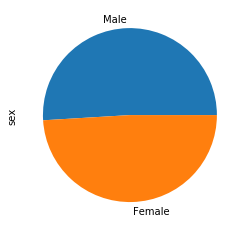

In [45]:
gender_count = clean_df['sex'].value_counts()
gender_count.plot(kind='pie')

In [46]:
gender_count

Male      958
Female    922
Name: sex, dtype: int64

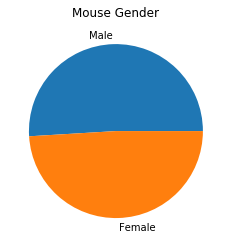

In [50]:
plt.pie(x= gender_count.values, labels = gender_count.index)
plt.title('Mouse Gender')
plt.show()

### Quartiles, Outliers and Boxplots

In [51]:
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
max_df = clean_df.groupby("mouse_id")["timepoint"].max().reset_index()

In [56]:
max_df

,mouse_id,timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [58]:
max_merge = clean_df.merge(max_df, on=['mouse_id', 'timepoint'])

In [59]:
max_merge

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [66]:
capomulin_df = max_merge.loc[max_merge["drug_regimen"]  == 'Capomulin']
ramicane_df = max_merge.loc[max_merge["drug_regimen"]  == 'Ramicane']
infubinol_df = max_merge.loc[max_merge["drug_regimen"]  == 'Infubinol']
ceftamin_df = max_merge.loc[max_merge["drug_regimen"]  == 'Ceftamin']

In [71]:
capomulin_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3


In [76]:
cap_vol = capomulin_df["tumor_volume_(mm3)"]
ram_vol = ramicane_df["tumor_volume_(mm3)"]
inf_vol = infubinol_df["tumor_volume_(mm3)"]
cef_vol = ceftamin_df["tumor_volume_(mm3)"]

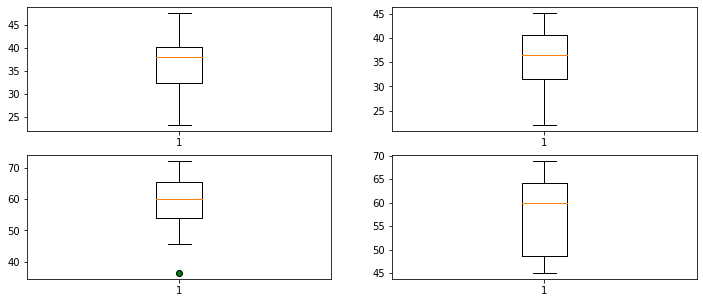

In [83]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,5))
green_circle = dict(markerfacecolor='g')
ax1.boxplot(cap_vol)
ax2.boxplot(ram_vol)
ax3.boxplot(inf_vol, flierprops=green_circle)
ax4.boxplot(cef_vol)
plt.show()